<a href="https://colab.research.google.com/github/sergfer26/Proyectos-II/blob/main/semana6/prueba_vgg_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Ejercicio] Prueba del modelo con mis propias imágenes

In [ ]:
import torch  
import numpy as np
from torch import nn
from PIL import Image
from google.colab import drive 
import torchvision.models as models
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

## Para utilizar los archivos de Drive

In [ ]:
from google.colab import drive # Colab
drive.mount('/content/drive') # Colab

Mounted at /content/drive


## Revisar disponibilidad del GPU

In [ ]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

print(device)

cuda


## Visualización de tensores como imágenes 

In [ ]:
def imshow(inp,cmap=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

## Definición del modelo

In [ ]:
vgg = models.vgg16(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### *Fine tuning*

In [ ]:
vgg.classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(16, 1),
    nn.Sigmoid()
)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Red neuronal dispoible para gpu

In [ ]:
if torch.cuda.is_available():
  vgg = vgg.cuda()

### Carga de modelo entrenado en clase

Es posible que sea necesario cambiar el `PATH` de donde se encuentra la imagen que usaremos. **Nota:** La red fue entreanada usando GPU, por lo que es necesario cargarla en una red habilitada para usar el GPU, de otra forma marcará error.

In [ ]:
PATH = '/content/drive/MyDrive/Classroom/Proyectos II Grupo 6034/models/vgg-dogs-vs-cats/'
vgg.load_state_dict(torch.load(PATH + 'net'))
vgg.eval() # Restringimos el uso de la red para evaluación

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## ¡Carga tu imagen y prueba la red entrenada

In [ ]:
img = Image.open('/content/drive/MyDrive/Classroom/Proyectos II Grupo 6034/data-sets/dogs-vs-cats/dimitri1.JPG')

Transformamos la imagen a tensor.

In [ ]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])

In [ ]:
img_tensor = simple_transform(img)
print('type: {}, shape: {}'.format(type(img_tensor), img_tensor.size()))

type: <class 'torch.Tensor'>, shape: torch.Size([3, 224, 224])


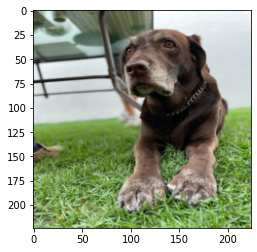

In [ ]:
imshow(img_tensor)

Redimencionamos la imagen de tal forma que la pueda entender la red neuronal.

In [ ]:
batch_tensor = torch.unsqueeze(img_tensor, 0)
print('shape: ', batch_tensor.size())

shape:  torch.Size([1, 3, 224, 224])


Probamos el modelo.

In [ ]:
out = vgg(batch_tensor.to(device))
prob = out.item()
print('En la imagen con {:.2f} de probabilidad aparece un perro'.format(prob))

La imagen con 0.87 de probilidad es un perro


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
